# Assignment 2

In [1]:
#Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from scipy.stats import norm
%matplotlib inline

### Load Dataset

In [2]:
#Import Data
stock_data = pd.read_excel('PS1-2_Studynet.xlsx')

#Clean Header
stock_data.columns = stock_data.columns.str.replace("Equity", "")
stock_data.columns = stock_data.columns.str.replace("SE", "")
stock_data.columns = stock_data.columns.str.replace("SW", "")
stock_data.columns = stock_data.columns.str.replace(" ", "")
stock_data = stock_data.set_index('Date')
stock_data = stock_data.loc['2010-01-01':'2017-12-29']

stock_data['LISN'] = stock_data.LISN / stock_data.LISN.shift(1) - 1
stock_data['BAER'] = stock_data.BAER / stock_data.BAER.shift(1) - 1
stock_data.head()

#print(type(stock_data.index))

,ABBN,SPSN,SIKA,LOGN,PGHN,DOKA,ZURN,AMS,GIVN,SOON,...,LONN,CLN,NESN,ARYN,HELN,GEBN,FHZN,ROG,PSPN,UBSG
Date,,,,,,,,,,,,,,,,,,,,,
2010-01-01,19.94,56.57,26.92,17.93,130.6,249.10,226.5,4.53,826.5,125.5,...,67.62,12.146,50.20,38.074,320.75,183.5,62.25,175.8,58.50,16.05
2010-01-08,21.05,57.69,27.75,18.65,138.2,257.25,232.4,5.10,863.0,128.9,...,73.13,12.573,49.11,38.667,334.75,185.3,62.35,178.5,61.30,17.21
2010-01-15,20.61,59.00,27.37,18.65,132.0,257.25,233.0,5.23,868.5,132.1,...,75.86,12.513,49.12,39.407,331.00,191.2,60.70,184.4,61.90,16.10
2010-01-22,19.26,58.22,26.40,18.44,131.4,263.00,226.9,5.59,873.0,133.6,...,73.08,11.609,50.55,40.988,326.50,189.2,58.50,184.8,60.60,14.93
2010-01-29,19.45,58.22,27.18,18.13,132.0,266.25,227.6,5.60,869.5,131.9,...,70.07,11.688,50.50,41.580,331.75,187.7,60.00,178.5,60.95,14.03


### Excercise 1.1

In [3]:
#m_lisn = np.mean(stock_data['LISN'])
#m_baer = np.mean(stock_data['BAER'])

def mad(data):
    return np.mean(np.absolute(data - np.mean(data)))

def semidev(data):
    return np.mean(np.power(np.minimum(stock_data['BAER'],0),2))

def exp_shortfall(alpha,data):
    #condiational variance, expected shortfall
    
    mu = np.mean(data)
    sigma = np.std(data)
    
    return (1 - alpha)** -1 * norm.pdf(norm.ppf(alpha))*sigma - mu

### Excersise 1.2

In [4]:
def emp_expshort(data, alpha):
    
    def delta(ret, vara):
        if ret < (vara*-1):
            return 1
        else:
            return 0
    
    def varalpha(data, alpha):
        return - (np.mean(data) - norm.ppf(alpha)*np.std(data))
    
    vara = varalpha(data, alpha)
    
    sum_delta = []
    
    for i in range(0,len(data)):
        sum_delta.append(delta(data[i], vara))

    ES = (-1/np.sum(sum_delta))*np.sum(sum_delta*data)
    
    return ES 

print(emp_expshort(stock_data['LISN'], 0.01))
print(emp_expshort(stock_data['LISN'], 0.05))


-0.0019138388926026048
-0.0004961411644774286


In [5]:
output = {'LISN':   [round(np.std(stock_data['LISN']),4), 
                         mad(stock_data['LISN']), 
                         semidev(stock_data['LISN']), 
                         exp_shortfall(0.05,stock_data['LISN']), 
                         exp_shortfall(0.01,stock_data['LISN']), 
                         emp_expshort(stock_data['LISN'], 0.05),
                         emp_expshort(stock_data['LISN'], 0.01)], 
          
          'BAER':   [round(np.std(stock_data['BAER']),4), 
                         mad(stock_data['BAER']), 
                         semidev(stock_data['BAER']), 
                         exp_shortfall(0.05,stock_data['BAER']), 
                         exp_shortfall(0.01,stock_data['BAER']),
                         emp_expshort(stock_data['BAER'], 0.05),
                         emp_expshort(stock_data['BAER'], 0.01)]}

ouput_table = pd.DataFrame(data = output, index = ['Std', 'Mad','Semi Dev', 
                                                   'Exp. Shortfall 95%',
                                                   'Exp. Shortfall 99%', 
                                                   'Empirical ES 95%',
                                                   'Empirical ES 99%',])
ouput_table

,LISN,BAER
Std,0.022400,0.038100
Mad,0.017053,0.026997
Semi Dev,0.000711,0.000711
Exp. Shortfall 95%,-0.000267,0.002154
Exp. Shortfall 99%,-0.002098,-0.000953
Empirical ES 95%,-0.000496,0.002799
Empirical ES 99%,-0.001914,-0.000675


### Excersice 1.3

In [6]:
initial_amount = 10000000

def invested_amount_std(data, initial_amount, period = 4):
    
    value_position = [initial_amount]
    
    for i in range(1,len(data)):
        
        value_position.append((1 + data[i]) * value_position[i-1])
        
    return np.round(np.std(value_position[0:4]),4)
    
print(invested_amount_std(stock_data['LISN'], initial_amount))
print(invested_amount_std(stock_data['BAER'], initial_amount))

143446.5335
239261.253


### Excersise 1.4

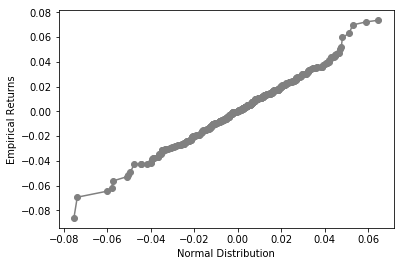

In [7]:
returns_sorted = stock_data.sort_values('LISN')['LISN']
sdt_norm = pd.DataFrame(np.random.normal(np.mean(stock_data['LISN']),np.std(stock_data['LISN']),size = len(stock_data['LISN'])))
sdt_norm = sdt_norm.sort_values(0)


plt.plot(sdt_norm, returns_sorted, color = 'grey', label = 'QQ', marker ='o')

plt.xlabel('Normal Distribution')
plt.ylabel('Empirical Returns')

plt.show()

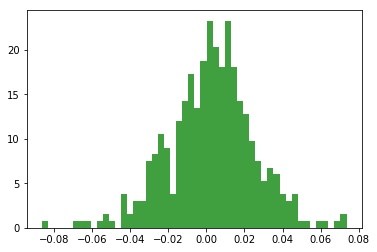

In [8]:
plt.hist(stock_data['LISN'][1:], 50 ,density = True, facecolor='g', alpha=0.75)
p = np.random.normal(np.mean(stock_data['LISN']),np.std(stock_data['LISN']),size = len(stock_data['LISN']))

#plt(list(sdt_norm[0]))

#plt.hist(stock_data['LISN'][1:], 50 ,density = True, facecolor='g', alpha=0.75)
plt.show()

### Excersise 2

In [9]:
stock_data2 = pd.read_excel('PS2-2.xlsx')

cols = ['WMT (Walmart)', 
        'AAPL (Apple)', 
        'DIS (The Walt Disney Company)', 
        'IBM (International Business Machines Corporation)', 
        'JNJ (Johnson & Johnson)',
        'KO (The Coca-Cola Company)',
        'NKE (NIKE, Inc.)',
        'TXN (Texas Instruments Incorporated)']

stock_data2 = stock_data2[cols]
stock_data2.head()
#TODO Calc Returns

,WMT (Walmart),AAPL (Apple),DIS (The Walt Disney Company),IBM (International Business Machines Corporation),JNJ (Johnson & Johnson),KO (The Coca-Cola Company),"NKE (NIKE, Inc.)",TXN (Texas Instruments Incorporated)
0,81.486946,102.244522,89.805153,133.791245,94.330956,37.991199,45.259899,48.342941
1,80.844254,103.152313,90.499176,134.107681,94.493309,37.982288,44.858578,48.042622
2,78.400185,102.759262,89.586502,133.243927,93.807800,37.919918,44.244785,47.969810
3,79.097206,99.970337,89.700562,132.191986,92.445770,37.759544,43.819859,47.678593
4,78.545029,99.193558,90.489670,134.389893,93.843887,37.893192,43.904850,48.497650


### Excersise 2.1

In [10]:
 def varalpha(data, alpha):
        return - (np.mean(data) - norm.ppf(alpha)*np.std(data))

In [29]:
output2 = {cols[0]:  [varalpha(stock_data2[cols[0]], 0.05), varalpha(stock_data2[cols[0]], 0.01), emp_expshort(stock_data2[cols[0]], 0.05), emp_expshort(stock_data2[cols[0]], 0.01)],  
           cols[1]:  [varalpha(stock_data2[cols[1]], 0.05), varalpha(stock_data2[cols[0]], 0.01), emp_expshort(stock_data2[cols[1]], 0.05), emp_expshort(stock_data2[cols[1]], 0.01)], 
           cols[2]:  [varalpha(stock_data2[cols[2]], 0.05), varalpha(stock_data2[cols[0]], 0.01), emp_expshort(stock_data2[cols[2]], 0.05), emp_expshort(stock_data2[cols[2]], 0.01)], 
           cols[3]:  [varalpha(stock_data2[cols[3]], 0.05), varalpha(stock_data2[cols[0]], 0.01), emp_expshort(stock_data2[cols[3]], 0.05), emp_expshort(stock_data2[cols[3]], 0.01)], 
           cols[4]:  [varalpha(stock_data2[cols[4]], 0.05), varalpha(stock_data2[cols[0]], 0.01), emp_expshort(stock_data2[cols[4]], 0.05), emp_expshort(stock_data2[cols[4]], 0.01)], 
           cols[5]:  [varalpha(stock_data2[cols[5]], 0.05), varalpha(stock_data2[cols[0]], 0.01), emp_expshort(stock_data2[cols[5]], 0.05), emp_expshort(stock_data2[cols[5]], 0.01)], 
           cols[6]:  [varalpha(stock_data2[cols[6]], 0.05), varalpha(stock_data2[cols[0]], 0.01), emp_expshort(stock_data2[cols[6]], 0.05), emp_expshort(stock_data2[cols[6]], 0.01)], 
          }

ouput_table2 = pd.DataFrame(data = output2, index = ['95% Var', '99% Var', 'Emp Var 95%', 'Emp Var 99%'])
ouput_table2

,WMT (Walmart),AAPL (Apple),DIS (The Walt Disney Company),IBM (International Business Machines Corporation),JNJ (Johnson & Johnson),KO (The Coca-Cola Company),"NKE (NIKE, Inc.)"
95% Var,-85.211395,-159.136294,-111.790221,-161.748533,-134.336668,-44.954936,-61.987342
99% Var,-91.606934,-91.606934,-91.606934,-91.606934,-91.606934,-91.606934,-91.606934
Emp Var 95%,-67.899750,-117.279282,-100.094725,-139.363016,-105.939832,-40.027668,-53.424528
Emp Var 99%,-68.379604,-121.300082,-100.646303,-141.009277,-108.356860,-40.310571,-54.186751


### Excersise 2.1

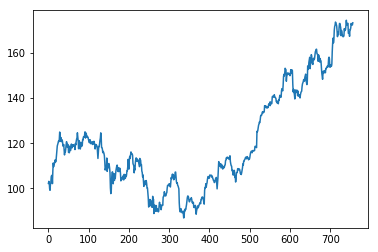

In [32]:
plt.plot(stock_data2['AAPL (Apple)'])
plt.show()

### Excersise 2.2

### Excersise 2.3

In [46]:
def portfolio_ret(w, expected_returns):
    return np.sum(expected_returns * w)

In [49]:
portfolio_weights = np.divide([55000, 15000, 23400, 43200, 131000, 321000, 104000, 38700],
                              np.sum([55000, 15000, 23400, 43200, 131000, 321000, 104000, 38700]))

assets_mean = np.round(
              [np.mean(stock_data2[cols[0]]), 
               np.mean(stock_data2[cols[1]]),
               np.mean(stock_data2[cols[2]]),
               np.mean(stock_data2[cols[3]]),
               np.mean(stock_data2[cols[4]]),
               np.mean(stock_data2[cols[5]]), 
               np.mean(stock_data2[cols[6]]),
               np.mean(stock_data2[cols[7]])],4)


portfolio_return = portfolio_ret(portfolio_weights, assets_mean)
print(portfolio_return)



67.5214611923971
